In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sn 
from seaborn import distplot
from seaborn import heatmap
import matplotlib.pyplot as plt
from matplotlib import style
import math
import time
import numpy as np
from tqdm import tqdm
import multiprocessing
import pickle
from math import isinf 
from scipy.interpolate import interp1d
from numpy import array, zeros, full, argmin, inf, ndim
from sklearn import preprocessing

In [2]:
df=pd.read_csv('/content/drive/MyDrive/RBCDSAI_Energy_Project/Energy_Theft/SGCC.csv')

In [3]:
l=df.columns
la=['CONS_NO','FLAG']
lb=[]
for i in l:
    if i not in la:
        lb.append(i)

In [4]:
import datetime
dates = [datetime.datetime.strptime(ts, "%Y/%m/%d") for ts in lb]
#dates.sort()
fdates = [datetime.datetime.strftime(ts, "%Y/%m/%d") for ts in dates]

In [5]:
fdates.insert(0,"FLAG")
fdates.insert(0,"CONS_NO")

In [6]:
df.columns=fdates

In [7]:
dates = [datetime.datetime.strptime(ts, "%Y/%m/%d") for ts in lb]
dates.sort()
sorteddates = [datetime.datetime.strftime(ts, "%Y/%m/%d") for ts in dates]

In [8]:
cols=df.columns.tolist()[0:2]+sorteddates
df=df[cols]

In [9]:
df1 = df.copy()

In [10]:
df1 = df1.fillna(df1.median())

In [11]:
df1 = df1.drop(['CONS_NO'], axis = 1)

In [12]:
df_0 = df1[df1['FLAG'] == 0].drop('FLAG', axis=1).reset_index(drop=True) # Normal user
df_1 = df1[df1['FLAG'] == 1].drop('FLAG', axis=1).reset_index(drop=True) # Abnormal user (energy thief)

In [ ]:
import random
#normal_row = random.randint(0, 38756)
normal_row = 35
plt.style.use('default')
plt.figure(figsize=(20, 10))
plt.plot(df_0.iloc[normal_row].to_list(), color='blue')
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.savefig('normal.png')

In [ ]:
abnormal_row = random.randint(0, 3614)
plt.figure(figsize=(20, 10))
plt.plot(df_1.iloc[abnormal_row].to_list(), color='red')
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.savefig('abnormal.png')

In [15]:
spring_0 = df.loc[:, '2015/04/01':'2015/06/01'] #+ df1.loc[:, '2015/04/01':'2015/06/01'] + df1.loc[:, '2016/04/01':'2016/06/01']
summer_0 = df.loc[:, '2015/06/01':'2015/09/01'] #+ df1.loc[:, '2015/06/01':'2015/09/01'] + df1.loc[:, '2016/06/01':'2016/09/01']
autumn_0 = df.loc[:, '2015/09/01':'2015/11/01'] #+ df1.loc[:, '2015/09/01':'2015/11/01'] + df1.loc[:, '2016/09/01':'2016/10/01']
winter_0 = df.loc[:, '2014/11/01':'2015/04/01'] #+ df1.loc[:, '2015/11/01':'2016/04/01']

In [16]:
avg_spring_0 = spring_0.mean(axis=0)
avg_summer_0 = summer_0.mean(axis=0)
avg_autumn_0 = autumn_0.mean(axis=0)
avg_winter_0 = winter_0.mean(axis=0)

In [17]:
total_0 = len(avg_spring_0)+len(avg_summer_0)+len(avg_autumn_0)+len(avg_winter_0)

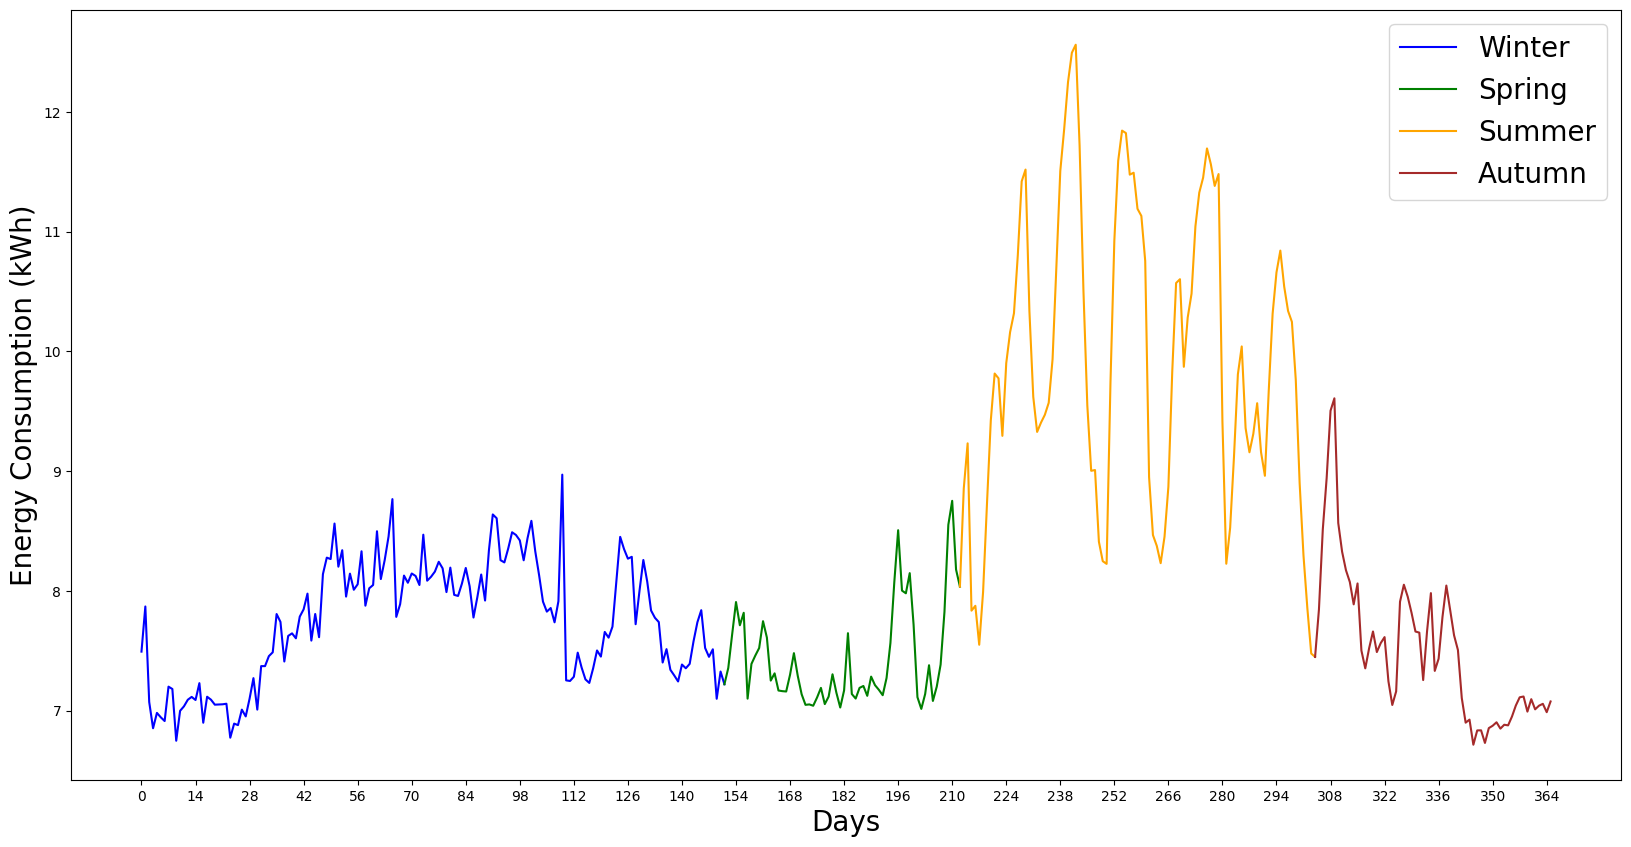

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(avg_winter_0, color='blue')
plt.plot(avg_spring_0, color='green')
plt.plot(avg_summer_0, color='orange')
plt.plot(avg_autumn_0, color='brown')
plt.xticks(range(0, total_0, 14), range(0, total_0, 14)) 
#plt.yticks(range(0, 25, 5), range(0, 25, 5)) 
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Winter', 'Spring', 'Summer', 'Autumn'], fontsize=20)
plt.savefig('Seasonality')